# 1. Load the dataset into python environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile,nan
from sklearn import preprocessing
df=pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [2]:
df.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 4. Fill in all the missing values present in all the columns in the dataset

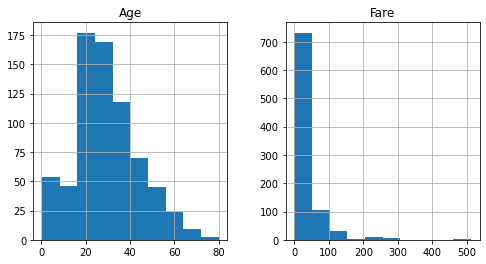

In [9]:
freq_graph = df.select_dtypes(include = 'float')
freq_graph.hist(figsize = (8,4))
plt.show()

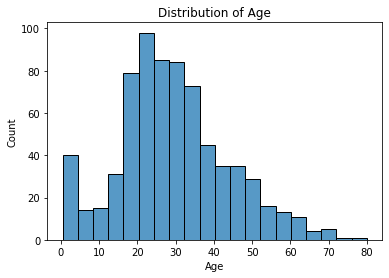

In [10]:
#checking the distribution of 'Age' column

sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

In [11]:
new_df = df
new_df['Age']=new_df['Age'].fillna(new_df['Age'].median())
new_df['Cabin']=new_df['Cabin'].fillna(new_df['Cabin'].mode()[0])
#new_df['Cabin']=new_df['Cabin'].replace(nan,'unknown')
new_df['Embarked']=new_df['Embarked'].fillna(new_df['Embarked'].mode()[0])
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
new_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

<AxesSubplot:>

<Figure size 1224x504 with 0 Axes>

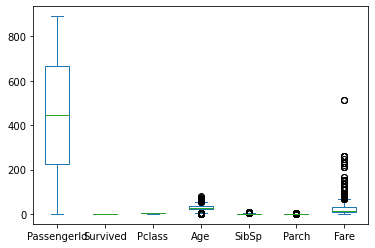

In [13]:
plt.figure(figsize=(17,7))
df.plot(kind='box', vert=True)

##### Handling outliers in Age

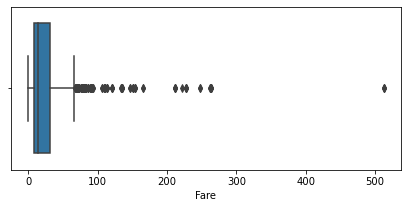

In [14]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Fare'])
plt.show()

In [15]:
# calculate interquartile range
q25, q75 = percentile(new_df['Fare'], 25), percentile(new_df['Fare'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=7.910, 75th=31.000, IQR=23.090


In [16]:
#calculate cutoff for outliers
cutoff=iqr*1.5
lower, upper = q25 - cutoff, q75 + cutoff
#identify outliers
outliers = [x for x in new_df['Fare'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers),outliers)

Identified outliers: 116 [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [17]:
# Remove outliers
outliers_removed = [x for x in new_df['Fare'] if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed),outliers_removed)

Non-outlier observations: 775 [7.25, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 13.0, 8.0292, 35.5, 21.075, 31.3875, 7.225, 7.8792, 7.8958, 27.7208, 7.75, 10.5, 52.0, 7.2292, 8.05, 18.0, 11.2417, 9.475, 21.0, 7.8958, 41.5792, 7.8792, 8.05, 15.5, 7.75, 21.6792, 17.8, 39.6875, 7.8, 26.0, 61.9792, 35.5, 10.5, 7.2292, 27.75, 46.9, 7.2292, 27.9, 27.7208, 15.2458, 10.5, 8.1583, 7.925, 8.6625, 10.5, 46.9, 14.4542, 56.4958, 7.65, 7.8958, 8.05, 29.0, 12.475, 9.0, 9.5, 7.7875, 47.1, 10.5, 15.85, 34.375, 8.05, 8.05, 8.05, 7.8542, 61.175, 20.575, 7.25, 8.05, 34.6542, 63.3583, 23.0, 26.0, 7.8958, 7.8958, 8.6542, 7.925, 7.8958, 7.65, 7.775, 7.8958, 24.15, 52.0, 14.4542, 8.05, 9.825, 14.4583, 7.925, 7.75, 21.0, 31.275, 8.05, 30.0708, 13.0, 11.2417, 7.75, 7.1417, 22.3583, 6.975, 7.8958, 7.05, 14.5, 26.0, 13.0, 15.0458, 26.2833, 53.1, 9.2167, 15.2458, 7.75, 15.85, 6.75, 11.5, 36.75, 7.7958, 34.375, 26.0, 13.0, 

{'whiskers': [<matplotlib.lines.Line2D at 0x12174c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x12174cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12174c130>],
 'medians': [<matplotlib.lines.Line2D at 0x121759370>],
 'fliers': [<matplotlib.lines.Line2D at 0x121759700>],
 'means': []}

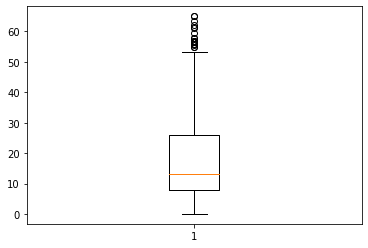

In [19]:
plt.boxplot(outliers_removed)

##### Handling outliers in Age

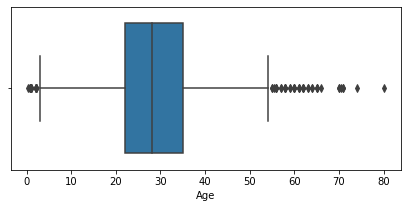

In [20]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Age'])
plt.show()

In [21]:
Q1=np.percentile(new_df['Age'],25,interpolation='midpoint')
print("First Quartile:",Q1)
Q2=np.percentile(new_df['Age'],50,interpolation='midpoint')
print("Second Quartile:",Q2)
Q3=np.percentile(new_df['Age'],75,interpolation='midpoint')
print("Third Quartile:",Q3)
IQR=Q3-Q1
print("Interquartile Range:",IQR)
lower=Q1-1.5*IQR
print("Lower Limit:",lower)
upper=Q3+1.5*IQR
print("Lower Limit:",upper)

First Quartile: 22.0
Second Quartile: 28.0
Third Quartile: 35.0
Interquartile Range: 13.0
Lower Limit: 2.5
Lower Limit: 54.5


In [22]:
Age_out=[x for x in new_df['Age'] if x < lower or x > upper]
print('Identified outliers: %d' % len(Age_out),Age_out)

Identified outliers: 66 [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [23]:
remove_AgeOut=[x for x in new_df['Age'] if x > lower and x < upper]
print('Non-outlier observations: %d'%len(remove_AgeOut),remove_AgeOut)

Non-outlier observations: 825 [22.0, 38.0, 26.0, 35.0, 35.0, 28.0, 54.0, 27.0, 14.0, 4.0, 20.0, 39.0, 14.0, 28.0, 31.0, 28.0, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 28.0, 19.0, 28.0, 28.0, 40.0, 28.0, 28.0, 28.0, 42.0, 28.0, 21.0, 18.0, 14.0, 40.0, 27.0, 28.0, 3.0, 19.0, 28.0, 28.0, 28.0, 28.0, 18.0, 7.0, 21.0, 49.0, 29.0, 28.0, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 28.0, 28.0, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, 28.0, 28.0, 30.0, 22.0, 29.0, 28.0, 28.0, 17.0, 33.0, 16.0, 28.0, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 28.0, 23.0, 34.0, 34.0, 28.0, 28.0, 21.0, 33.0, 37.0, 28.0, 21.0, 28.0, 38.0, 28.0, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 29.0, 24.0, 21.0, 28.0, 32.5, 32.5, 54.0, 12.0, 28.0, 24.0, 28.0, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 16.0, 24.0, 28.0, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 9.0, 36.5, 42.0, 51.0, 22.0, 40.5, 28.0, 51.0, 16.0, 30.0, 28.0, 28.0, 44.0, 40.0, 26.0, 17.0, 9.0, 28.0, 45.0, 28.0, 28.0, 4.0, 21.0, 18.0, 28.0, 50.0, 30.0, 

{'whiskers': [<matplotlib.lines.Line2D at 0x1218d3d00>,
 'caps': [<matplotlib.lines.Line2D at 0x121938460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1218d3970>],
 'medians': [<matplotlib.lines.Line2D at 0x121938b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x121938f10>],
 'means': []}

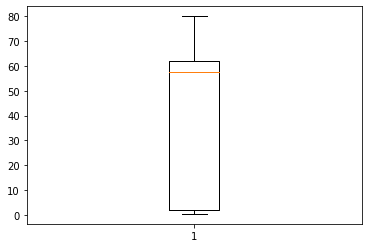

In [24]:
plt.boxplot(Age_out)

### Handle Outlier in SibSp

In [25]:
# calculate interquartile range
q25, q75 = percentile(df['SibSp'], 25), percentile(df['SibSp'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=0.000, 75th=1.000, IQR=1.000


In [26]:
#calculate cutoff for outliers
cutoff=iqr*1.5
lower, upper = q25 - cutoff, q75 + cutoff
#identify outliers
outliers = [x for x in df['SibSp'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers),outliers)

Identified outliers: 46 [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [27]:
# Remove outliers
SibSpOut = [x for x in df['SibSp'] if x > lower and x < upper]
print('Non-outlier observations: %d' % len(SibSpOut),SibSpOut)

Non-outlier observations: 845 [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 

{'whiskers': [<matplotlib.lines.Line2D at 0x121a17af0>,
 'caps': [<matplotlib.lines.Line2D at 0x121a26250>,
 'boxes': [<matplotlib.lines.Line2D at 0x121a17760>],
 'medians': [<matplotlib.lines.Line2D at 0x121a26970>],
 'fliers': [<matplotlib.lines.Line2D at 0x121a26d00>],
 'means': []}

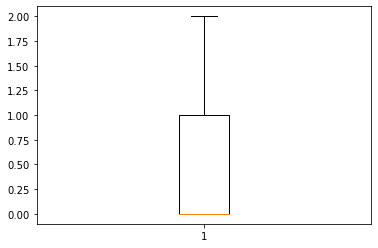

In [28]:
plt.boxplot(SibSpOut)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [29]:
new_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [30]:
std_scale = preprocessing.StandardScaler().fit(df[['Survived']])
df_std = std_scale.transform(df[['Survived']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Survived']])
df_minmax = minmax_scale.transform(df[['Survived']])

In [31]:
print('Mean after standardization:\nSurvived={:.2f}'
      .format(df_std[:,0].mean()))
print('\nStandard deviation after standardization:\nSurvived={:.2f}'
      .format(df_std[:,0].std()))

Mean after standardization:
Survived=0.00

Standard deviation after standardization:
Survived=1.00


In [32]:
print('Min-value after min-max scaling:\nSurvived={:.2f}'
      .format(df_minmax[:,0].min()))
print('\nMax-value after min-max scaling:\nSurvived={:.2f}'
      .format(df_minmax[:,0].max()))

Min-value after min-max scaling:
Survived=0.00

Max-value after min-max scaling:
Survived=1.00


OR

In [33]:
arr=np.array(new_df['Survived']).reshape(-1, 1)
MNXscaler=preprocessing.MinMaxScaler()
scaled_Survived=pd.DataFrame(MNXscaler.fit_transform(arr),
                             columns=['Survived'],
                             index=new_df.index)
scaled_Survived

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [34]:
new_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64